# Latihan Read Data Time Series


d:\work\python\forecast\.venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


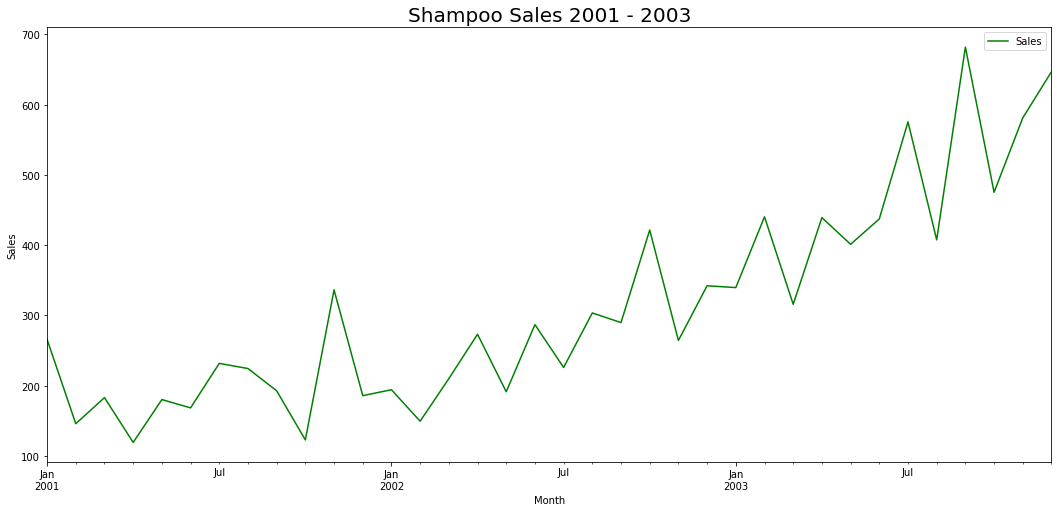

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

# nama file csv
file_csv = 'shampoo.csv'
# nama kolom untuk index (Month)
index_name = 'Month'
# nama kolom untuk data (Sales)
data_name = 'Sales'



# callback untuk parsing date
# yang dipanggil oleh read_csv
def date_parser_function(date):
    date = "200" + date
    return datetime.strptime(date, '%Y-%m')


# header = menunjukkan header ada di baris ke berapa, baris dimulai dari 0, jika tidak ada header diisi -1
# index_col = menunjukkan kolom yg dijadikan index
# date_parser = nama callback untuk parsing date
# parse_dates = array berisi nama kolom yang perlu di parse
df_shampoo = pd.read_csv(file_csv, header=0, index_col=index_name, date_parser=date_parser_function, parse_dates=[index_name])
# print(df_shampoo)


def show_plot(df, title, color):
    df.plot(color=color, figsize=(18,8))
    plt.title(title, fontsize=20)
    plt.xlabel('Month')
    plt.ylabel('Sales')

show_plot(df_shampoo, 'Shampoo Sales 2001 - 2003', 'green')
plt.show()


# print(df_shampoo)


# Simple Moving Average

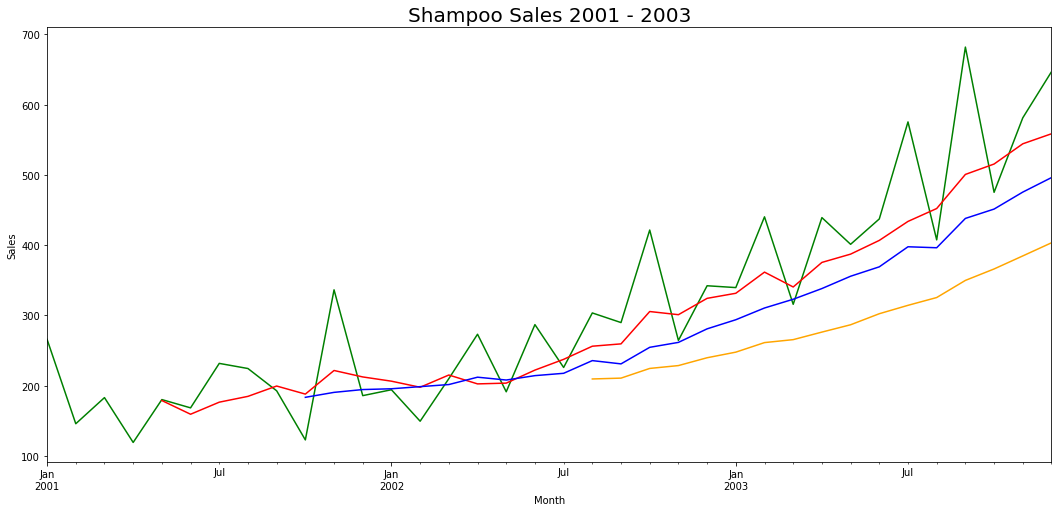

In [2]:
# syntax nya SMA menggunakan pandas
# df.rolling(window=m).mean()

# df.rolling(window=m)
# df.mean()

df_shampoo['sma5'] = df_shampoo['Sales'].rolling(window=5).mean()
df_shampoo['sma10'] = df_shampoo['Sales'].rolling(window=10).mean()
df_shampoo['sma20'] = df_shampoo['Sales'].rolling(window=20).mean()


# plt show = memunculkan semua dataframe yg sudah 'booking'
# jika per booking panggil plt.show() berarti beda blok grafik
show_plot(df_shampoo['Sales'], 'Shampoo Sales 2001 - 2003', 'green')
show_plot(df_shampoo['sma5'], 'Shampoo Sales 2001 - 2003', 'red')
show_plot(df_shampoo['sma10'], 'Shampoo Sales 2001 - 2003', 'blue')
show_plot(df_shampoo['sma20'], 'Shampoo Sales 2001 - 2003', 'orange')
plt.show()

# print(df_shampoo)

# Exponential Moving Average

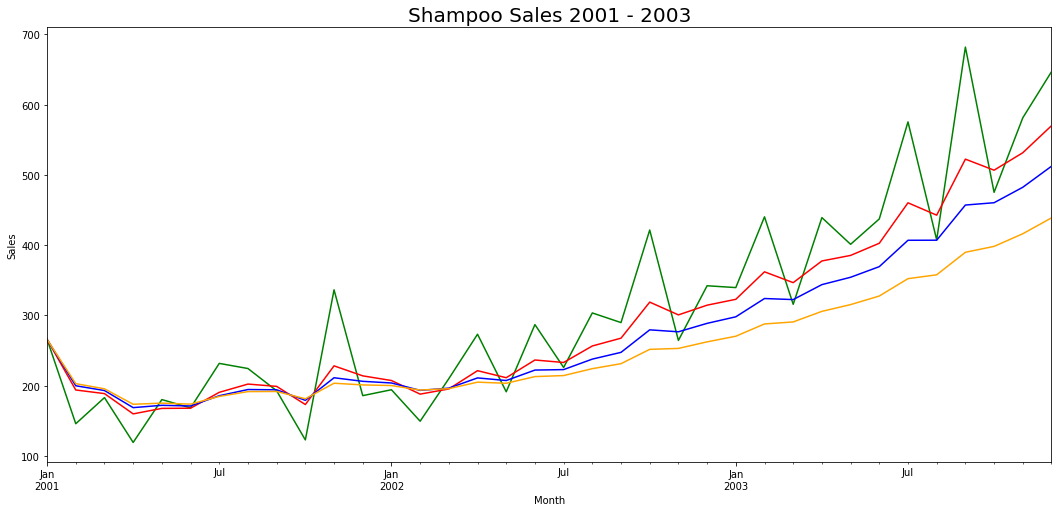

In [13]:
# syntax nya EMA menggunakan pandas
# df.ewm(span=m).mean()

# df.ewm(span=m)
# df.mean()

df_shampoo['ema5'] = df_shampoo['Sales'].ewm(span=5).mean()
df_shampoo['ema10'] = df_shampoo['Sales'].ewm(span=10).mean()
df_shampoo['ema20'] = df_shampoo['Sales'].ewm(span=20).mean()

# plt show = memunculkan semua dataframe yg sudah 'booking'
# jika per booking panggil plt.show() berarti beda blok grafik
show_plot(df_shampoo['Sales'], 'Shampoo Sales 2001 - 2003', 'green')
show_plot(df_shampoo['ema5'], 'Shampoo Sales 2001 - 2003', 'red')
show_plot(df_shampoo['ema10'], 'Shampoo Sales 2001 - 2003', 'blue')
show_plot(df_shampoo['ema20'], 'Shampoo Sales 2001 - 2003', 'orange')
plt.show()

# print(df_shampoo)

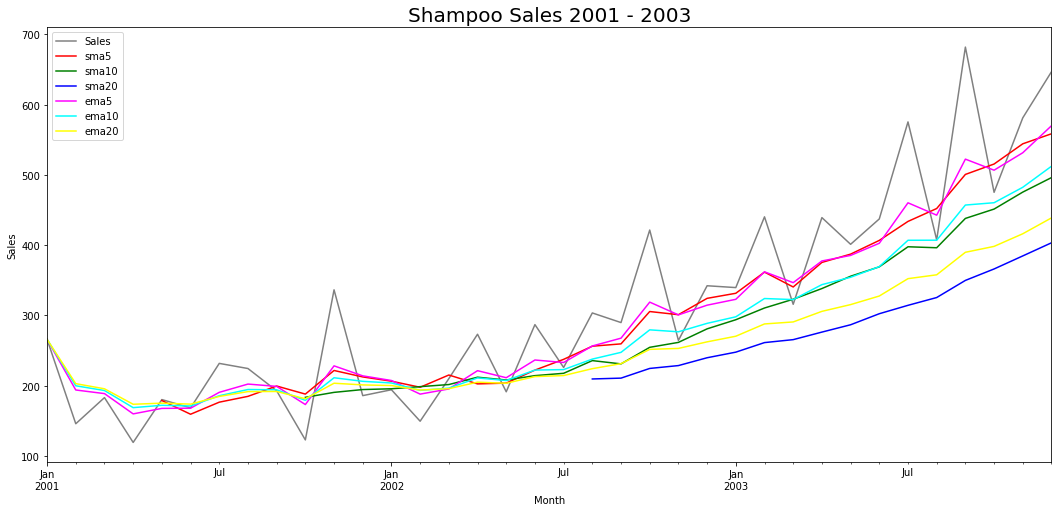

In [4]:
# print(df_shampoo)
arr_color = [
    'gray',
    'red',
    'green',
    'blue',
    'magenta',
    'cyan',
    'yellow'
]

show_plot(df_shampoo, 'Shampoo Sales 2001 - 2003', arr_color)
plt.show()

# Weighted Moving Average

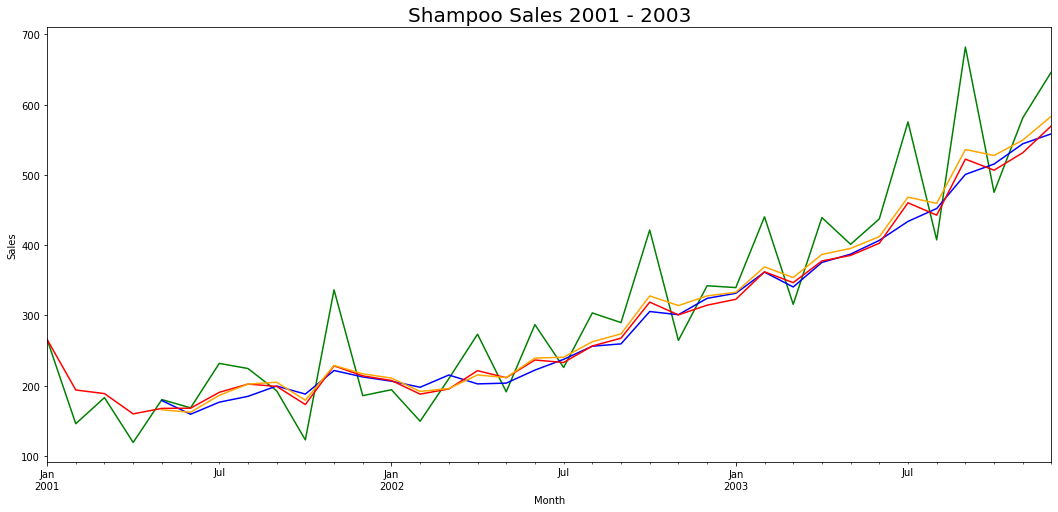

In [30]:
def wma(df, m):
    df_new = df.rolling(m).apply(lambda x: x[::-1].cumsum().sum() * 2 / m / (m + 1))
    return df_new
    
df_shampoo['wma5'] = wma(df_shampoo['Sales'], 5)
df_shampoo['wma10'] = wma(df_shampoo['Sales'], 10)
df_shampoo['wma20'] = wma(df_shampoo['Sales'], 20)
show_plot(df_shampoo['Sales'], 'Shampoo Sales 2001 - 2003', 'green')
show_plot(df_shampoo['sma5'], 'Shampoo Sales 2001 - 2003', 'blue')
show_plot(df_shampoo['ema5'], 'Shampoo Sales 2001 - 2003', 'red')
show_plot(df_shampoo['wma5'], 'Shampoo Sales 2001 - 2003', 'orange')
# show_plot(df_shampoo['wma10'], 'Shampoo Sales 2001 - 2003', 'red')
# show_plot(df_shampoo['wma15'], 'Shampoo Sales 2001 - 2003', 'orange')
plt.show()

# Mean Squared Error

In [34]:
from sklearn.metrics import mean_squared_error as mse

# arr = [5,2,1,8,2,6]
# arr[0] => 5
# arr[4] => 2
# arr[-1] => 6
# arr[0:2] => [5,2,1]
# arr[:3] => [5,2,1,8]
# arr[3:] => [8,2,6]

mse5 = mse(df_shampoo['Sales'][5:], df_shampoo['wma5'][5:])
mse10 = mse(df_shampoo['Sales'][10:], df_shampoo['wma10'][10:])
mse20 = mse(df_shampoo['Sales'][20:], df_shampoo['wma20'][20:])

print('mse5: '+ str(mse5))
print('mse10: '+ str(mse10))
print('mse20: '+ str(mse20))


mse5: 3018.040623655915
mse10: 5942.476836490778
mse20: 16838.234224178


# Mean Absolute Error

In [37]:
from sklearn.metrics import mean_absolute_error as mae

mse5 = mae(df_shampoo['Sales'][5:], df_shampoo['sma5'][5:])
mse10 = mae(df_shampoo['Sales'][10:], df_shampoo['sma10'][10:])
mse20 = mae(df_shampoo['Sales'][20:], df_shampoo['sma20'][20:])

print("SMA")
print('mae5: '+ str(mse5))
print('mae10: '+ str(mse10))
print('mae20: '+ str(mse20))

print('\nEMA')
mse5 = mae(df_shampoo['Sales'][5:], df_shampoo['ema5'][5:])
mse10 = mae(df_shampoo['Sales'][10:], df_shampoo['ema10'][10:])
mse20 = mae(df_shampoo['Sales'][20:], df_shampoo['ema20'][20:])

print('mae5: '+ str(mse5))
print('mae10: '+ str(mse10))
print('mae20: '+ str(mse20))

print('\nWMA')
mse5 = mae(df_shampoo['Sales'][5:], df_shampoo['wma5'][5:])
mse10 = mae(df_shampoo['Sales'][10:], df_shampoo['wma10'][10:])
mse20 = mae(df_shampoo['Sales'][20:], df_shampoo['wma20'][20:])

print('mae5: '+ str(mse5))
print('mae10: '+ str(mse10))
print('mae20: '+ str(mse20))
print('\n')

SMA
mae5: 49.779999999999994
mae10: 70.78538461538461
mae20: 148.263125

EMA
mae5: 44.96843162087878
mae10: 65.04330658797242
mae20: 119.38482173644476

WMA
mae5: 43.91075268817204
mae10: 58.79139860139858
mae20: 108.26285714285711




# Root Mean Squared Error

In [38]:
mse5 = mse(df_shampoo['Sales'][5:], df_shampoo['sma5'][5:], squared=False)
mse10 = mse(df_shampoo['Sales'][10:], df_shampoo['sma10'][10:], squared=False)
mse20 = mse(df_shampoo['Sales'][20:], df_shampoo['sma20'][20:], squared=False)

print("SMA")
print('rmse5: '+ str(mse5))
print('rmse10: '+ str(mse10))
print('rmse20: '+ str(mse20))

print('\nEMA')
mse5 = mse(df_shampoo['Sales'][5:], df_shampoo['ema5'][5:], squared=False)
mse10 = mse(df_shampoo['Sales'][10:], df_shampoo['ema10'][10:], squared=False)
mse20 = mse(df_shampoo['Sales'][20:], df_shampoo['ema20'][20:], squared=False)

print('rmse5: '+ str(mse5))
print('rmse10: '+ str(mse10))
print('rmse20: '+ str(mse20))

print('\nWMA')
mse5 = mse(df_shampoo['Sales'][5:], df_shampoo['wma5'][5:], squared=False)
mse10 = mse(df_shampoo['Sales'][10:], df_shampoo['wma10'][10:], squared=False)
mse20 = mse(df_shampoo['Sales'][20:], df_shampoo['wma20'][20:], squared=False)

print('rmse5: '+ str(mse5))
print('rmse10: '+ str(mse10))
print('rmse20: '+ str(mse20))
print('\n')

SMA
rmse5: 64.97611203730084
rmse10: 94.95521713701919
rmse20: 168.2049982536191

EMA
rmse5: 57.3708765099325
rmse10: 86.40654312169498
rmse20: 141.11276493766567

WMA
rmse5: 54.93669651203934
rmse10: 77.08746225224162
rmse20: 129.76222186822326




# Mean Absolute Percentage Error

In [39]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mse5 = mape(df_shampoo['Sales'][5:], df_shampoo['sma5'][5:])
mse10 = mape(df_shampoo['Sales'][10:], df_shampoo['sma10'][10:])
mse20 = mape(df_shampoo['Sales'][20:], df_shampoo['sma20'][20:])

print("SMA")
print('mape5: '+ str(mse5))
print('mape10: '+ str(mse10))
print('mape20: '+ str(mse20))

print('\nEMA')
mse5 = mape(df_shampoo['Sales'][5:], df_shampoo['ema5'][5:])
mse10 = mape(df_shampoo['Sales'][10:], df_shampoo['ema10'][10:])
mse20 = mape(df_shampoo['Sales'][20:], df_shampoo['ema20'][20:])

print('mape5: '+ str(mse5))
print('mape10: '+ str(mse10))
print('mape20: '+ str(mse20))

print('\nWMA')
mse5 = mape(df_shampoo['Sales'][5:], df_shampoo['wma5'][5:])
mse10 = mape(df_shampoo['Sales'][10:], df_shampoo['wma10'][10:])
mse20 = mape(df_shampoo['Sales'][20:], df_shampoo['wma20'][20:])

print('mape5: '+ str(mse5))
print('mape10: '+ str(mse10))
print('mape20: '+ str(mse20))
print('\n')

SMA
mape5: 0.15134264219736676
mape10: 0.17612956770137808
mape20: 0.31634566621188853

EMA
mape5: 0.1341303603487163
mape10: 0.16426783586322952
mape20: 0.24899695496840987

WMA
mape5: 0.13716425370859092
mape10: 0.15338496465525603
mape20: 0.22657314282792712


